In [2]:
import numpy as np
import os

np.random.seed(42)

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "HAR"
IMAGE_PATH = os.path.join(PROJECT_ROOT_DIR,"images",CHAPTER_ID)

def save_fig(fig_id,tight_layout=True,fig_extension="png",resolution =300 ):
    path = os.path.join(IMAGE_PATH,fig_id+"."+fig_extension)
    print("Saving figure",fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path,format=fig_extension,dpi = resolution)

In [64]:
import pandas as pd

aras = pd.read_csv("DAY_1.csv")

In [65]:
aras = aras.drop(['Resident2'],axis=1)

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [5]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in split.split(aras, aras["Resident1"]):
    strat_train_set = aras.loc[train_index]
    strat_test_set = aras.loc[test_index]

In [7]:
strat_train_set['Resident1'].value_counts()

11    19087
2     16277
17     5494
12     4539
13     4440
7      2665
22     1761
8      1176
4      1167
1      1069
15      793
3       678
21      482
19      468
27      384
Name: Resident1, dtype: int64

In [8]:
strat_test_set['Resident1'].value_counts()

11    8180
2     6976
17    2354
12    1946
13    1903
7     1142
22     755
8      504
4      500
1      458
15     340
3      290
21     207
19     200
27     165
Name: Resident1, dtype: int64

In [9]:
train_set_X = strat_train_set.drop(['Resident1'],axis =1)
train_set_label = strat_train_set.iloc[:,20]

test_set_X = strat_test_set.drop(['Resident1'],axis =1)
test_set_label = strat_test_set.iloc[:,20]
train_set_X

,Ph1,Ph2,Ir1,Fo1,Fo2,Di3,Di4,Ph3,Ph4,Ph5,Ph6,Co1,Co2,Co3,So1,So2,Di1,Di2,Te1,Fo3
2371,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
85948,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60429,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
76021,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
28051,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40018,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
81532,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
33128,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17253,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
62289,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [45]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.ensemble import RandomForestClassifier
ovo_clf = OneVsOneClassifier(RandomForestClassifier(random_state=42,class_weight="balanced"))
ovo_clf.fit(train_set_X, train_set_label)


OneVsOneClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
          n_jobs=1)

In [46]:
test_predict = ovo_clf.predict(test_set_X)

In [47]:
from sklearn.metrics import mean_squared_error

print (ovo_clf.score(test_set_X,test_set_label))
print (ovo_clf.score(train_set_X,train_set_label))
lin_mse = mean_squared_error(test_set_label, test_predict)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.53599537037
0.533498677249


7.7561032320153531

In [48]:
from sklearn.model_selection import cross_val_score
cross_val_score(ovo_clf, test_set_X,test_set_label, cv=3, scoring="accuracy")

array([ 0.53487565,  0.53459847,  0.53712499])

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_set_X.astype(np.float64))
cross_val_score(ovo_clf, X_train_scaled, train_set_label, cv=3, scoring="accuracy")

array([ 0.54245189,  0.53370703,  0.53118024])

In [50]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(ovo_clf, X_train_scaled, train_set_label, cv=3)
conf_mx = confusion_matrix(test_set_label, test_predict)
print(conf_mx)

[[  10    0    1    4   76    6  115    0    0    0    0  236    1    0
     9]
 [   0   74  938    0 1227    0  825    0    0  222    0 3685    0    0
     5]
 [   0    0  184   71    0    9    0    0    0    0    2   24    0    0
     0]
 [   0    0   29  438    0    5    0    0    0    0    0   24    0    2
     2]
 [   0    0  144    4  816   24   64    0    0   20    0   64    0    0
     6]
 [   1    0    2   34    7  287   18    0   69    0    0   82    1    1
     2]
 [   0    0    0    0    5    0 8119   20    0    0   21    4    0   11
     0]
 [   0    0    0  192    0    4   43 1636    0    0    0   60    2    4
     5]
 [   0    0    0    0    0    0    0    0 1459    0    0  443    0    0
     1]
 [   0    0    0   57    0    2    0    0   12  241    0   27    0    1
     0]
 [   0    0    0    0    0  212  381  643  748    0  260   94    0   16
     0]
 [   0    0    1    0    0    0    0    0    3    0    0  189    0    0
     7]
 [   0    0    0   75    0    0    0   6

In [51]:
conf_mx_true = confusion_matrix(test_set_label, test_set_label)
conf_mx_true

array([[ 458,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [   0, 6976,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [   0,    0,  290,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [   0,    0,    0,  500,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [   0,    0,    0,    0, 1142,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [   0,    0,    0,    0,    0,  504,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 8180,    0,    0,    0,    0,
           0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 1946,    0,    0,    0,
           0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1903,    0,    0,
           0,    0,    0,    0],
       [   0,    0,    0,    0,    0,

In [52]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

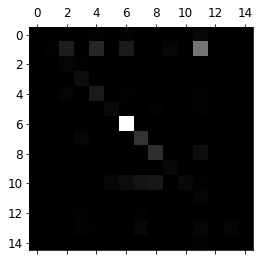

In [53]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [54]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

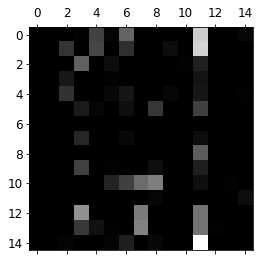

In [55]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

plt.show()

In [56]:
from sklearn.metrics import f1_score
f1_score(test_set_label, test_predict,average="macro")

0.3849194910455902